In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import easygui as eg
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore")

In [2]:
path = eg.fileopenbox()

In [3]:
path

'C:\\Users\\DELL\\Downloads\\house_prediction_data\\train.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.reset_index(drop =True,inplace=True)

In [6]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


# shape:

In [7]:
df.shape

(29451, 12)

In [8]:
df.columns = [i.lower().replace('.','') for i in df.columns]

In [9]:
df.rename(columns={'target(price_in_lacs)':'target'},inplace=True)

In [10]:
df.drop(columns='address',inplace=True)

In [11]:
df

,posted_by,under_construction,rera,bhk_no,bhk_or_rk,square_ft,ready_to_move,resale,longitude,latitude,target
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0


# Duplicate_check

In [12]:
df.duplicated().value_counts()

False    28566
True       885
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(28566, 11)

# info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28566 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   posted_by           28566 non-null  object 
 1   under_construction  28566 non-null  int64  
 2   rera                28566 non-null  int64  
 3   bhk_no              28566 non-null  int64  
 4   bhk_or_rk           28566 non-null  object 
 5   square_ft           28566 non-null  float64
 6   ready_to_move       28566 non-null  int64  
 7   resale              28566 non-null  int64  
 8   longitude           28566 non-null  float64
 9   latitude            28566 non-null  float64
 10  target              28566 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.6+ MB


# describe:

In [16]:
df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,target
count,28566.000000,28566.000000,28566.000000,2.856600e+04,28566.000000,28566.000000,28566.000000,28566.000000,28566.000000
mean,0.177029,0.313345,2.393685,2.034010e+04,0.822971,0.932017,21.303675,76.888819,139.365177
std,0.381700,0.463861,0.880475,1.930560e+06,0.381700,0.251721,6.238220,10.645014,646.610955
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000474e+02,1.000000,1.000000,18.347616,73.839897,37.200000
50%,0.000000,0.000000,2.000000,1.175127e+03,1.000000,1.000000,21.000000,77.335746,60.000000
75%,0.000000,1.000000,3.000000,1.550388e+03,1.000000,1.000000,26.900926,78.039980,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


# Finding null values:

In [17]:
df.isnull().sum()

posted_by             0
under_construction    0
rera                  0
bhk_no                0
bhk_or_rk             0
square_ft             0
ready_to_move         0
resale                0
longitude             0
latitude              0
target                0
dtype: int64

<AxesSubplot:>

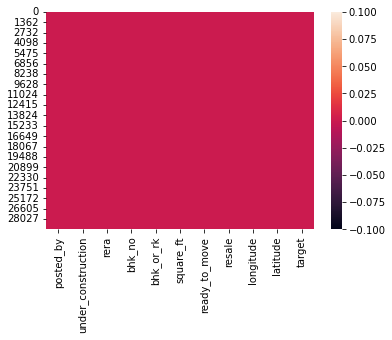

In [18]:
sns.heatmap(df.isnull())  

# Unique Values:

In [19]:
def unique(x):
    count = 0
    for i in x.unique():
        count+=1
    print(f'Count of unique values in {x.name} : {count}')
    print(x.unique())

In [20]:
unique(df.under_construction)

Count of unique values in under_construction : 2
[0 1]


In [21]:
unique(df.rera)

Count of unique values in rera : 2
[0 1]


In [22]:
unique(df.ready_to_move	)

Count of unique values in ready_to_move : 2
[1 0]


In [23]:
unique(df.resale)

Count of unique values in resale : 2
[1 0]


In [24]:
unique(df.bhk_no)

Count of unique values in bhk_no : 16
[ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]


In [25]:
unique(df.posted_by )

Count of unique values in posted_by : 3
['Owner' 'Dealer' 'Builder']


In [26]:
unique(df.bhk_or_rk)

Count of unique values in bhk_or_rk : 2
['BHK' 'RK']


In [27]:
df.bhk_or_rk.value_counts()

BHK    28542
RK        24
Name: bhk_or_rk, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28566 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   posted_by           28566 non-null  object 
 1   under_construction  28566 non-null  int64  
 2   rera                28566 non-null  int64  
 3   bhk_no              28566 non-null  int64  
 4   bhk_or_rk           28566 non-null  object 
 5   square_ft           28566 non-null  float64
 6   ready_to_move       28566 non-null  int64  
 7   resale              28566 non-null  int64  
 8   longitude           28566 non-null  float64
 9   latitude            28566 non-null  float64
 10  target              28566 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.6+ MB


# univariante:

In [29]:
y = df['target']

In [30]:
df_cat = df.drop(columns=['target','square_ft','longitude','latitude'])
df_num = df.drop(columns=['posted_by','under_construction','rera','bhk_no','bhk_or_rk','ready_to_move', 'resale'])

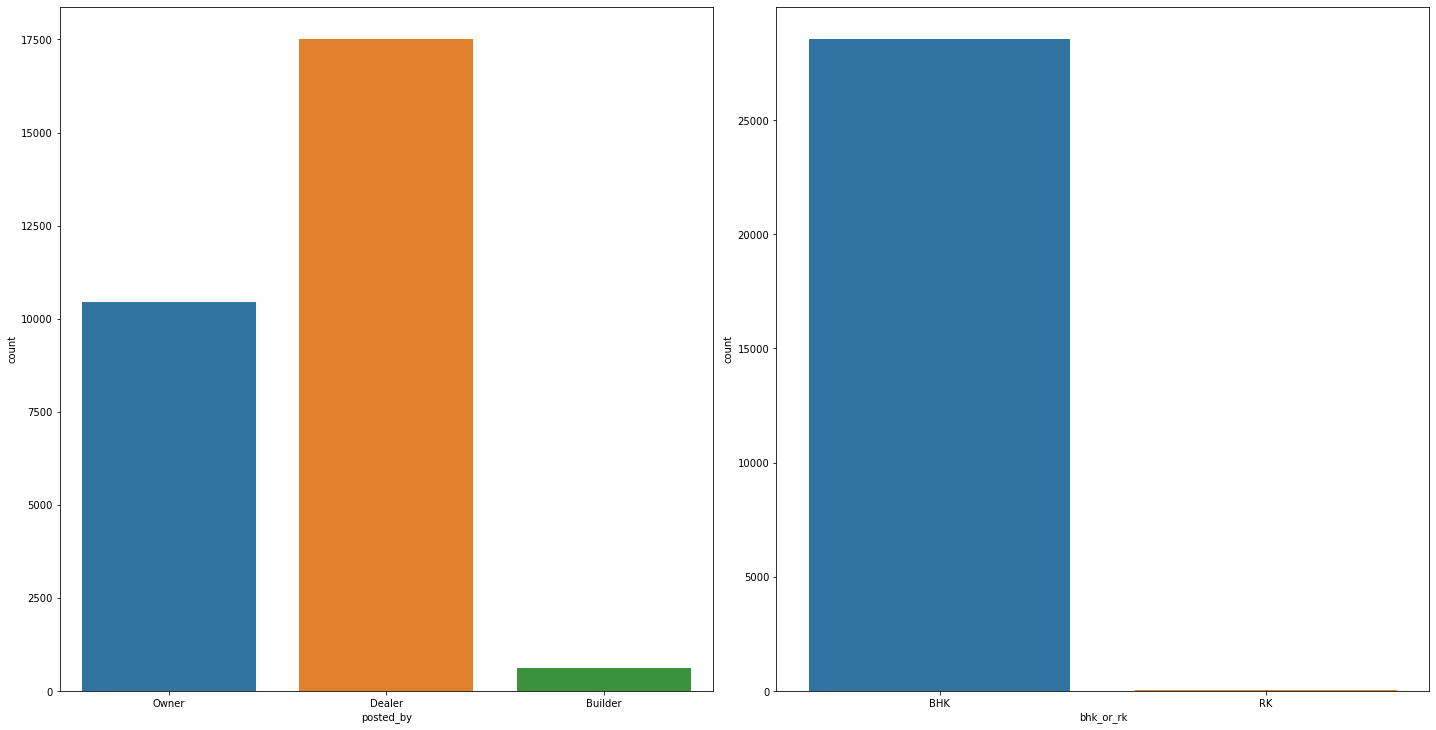

In [31]:
plt.figure(figsize=(30,30))
j=1
for columns in df_cat.select_dtypes(include='object'):
    plt.subplot(3,3,j)
    sns.countplot(x=columns,data=df)
    j+=1
plt.tight_layout()

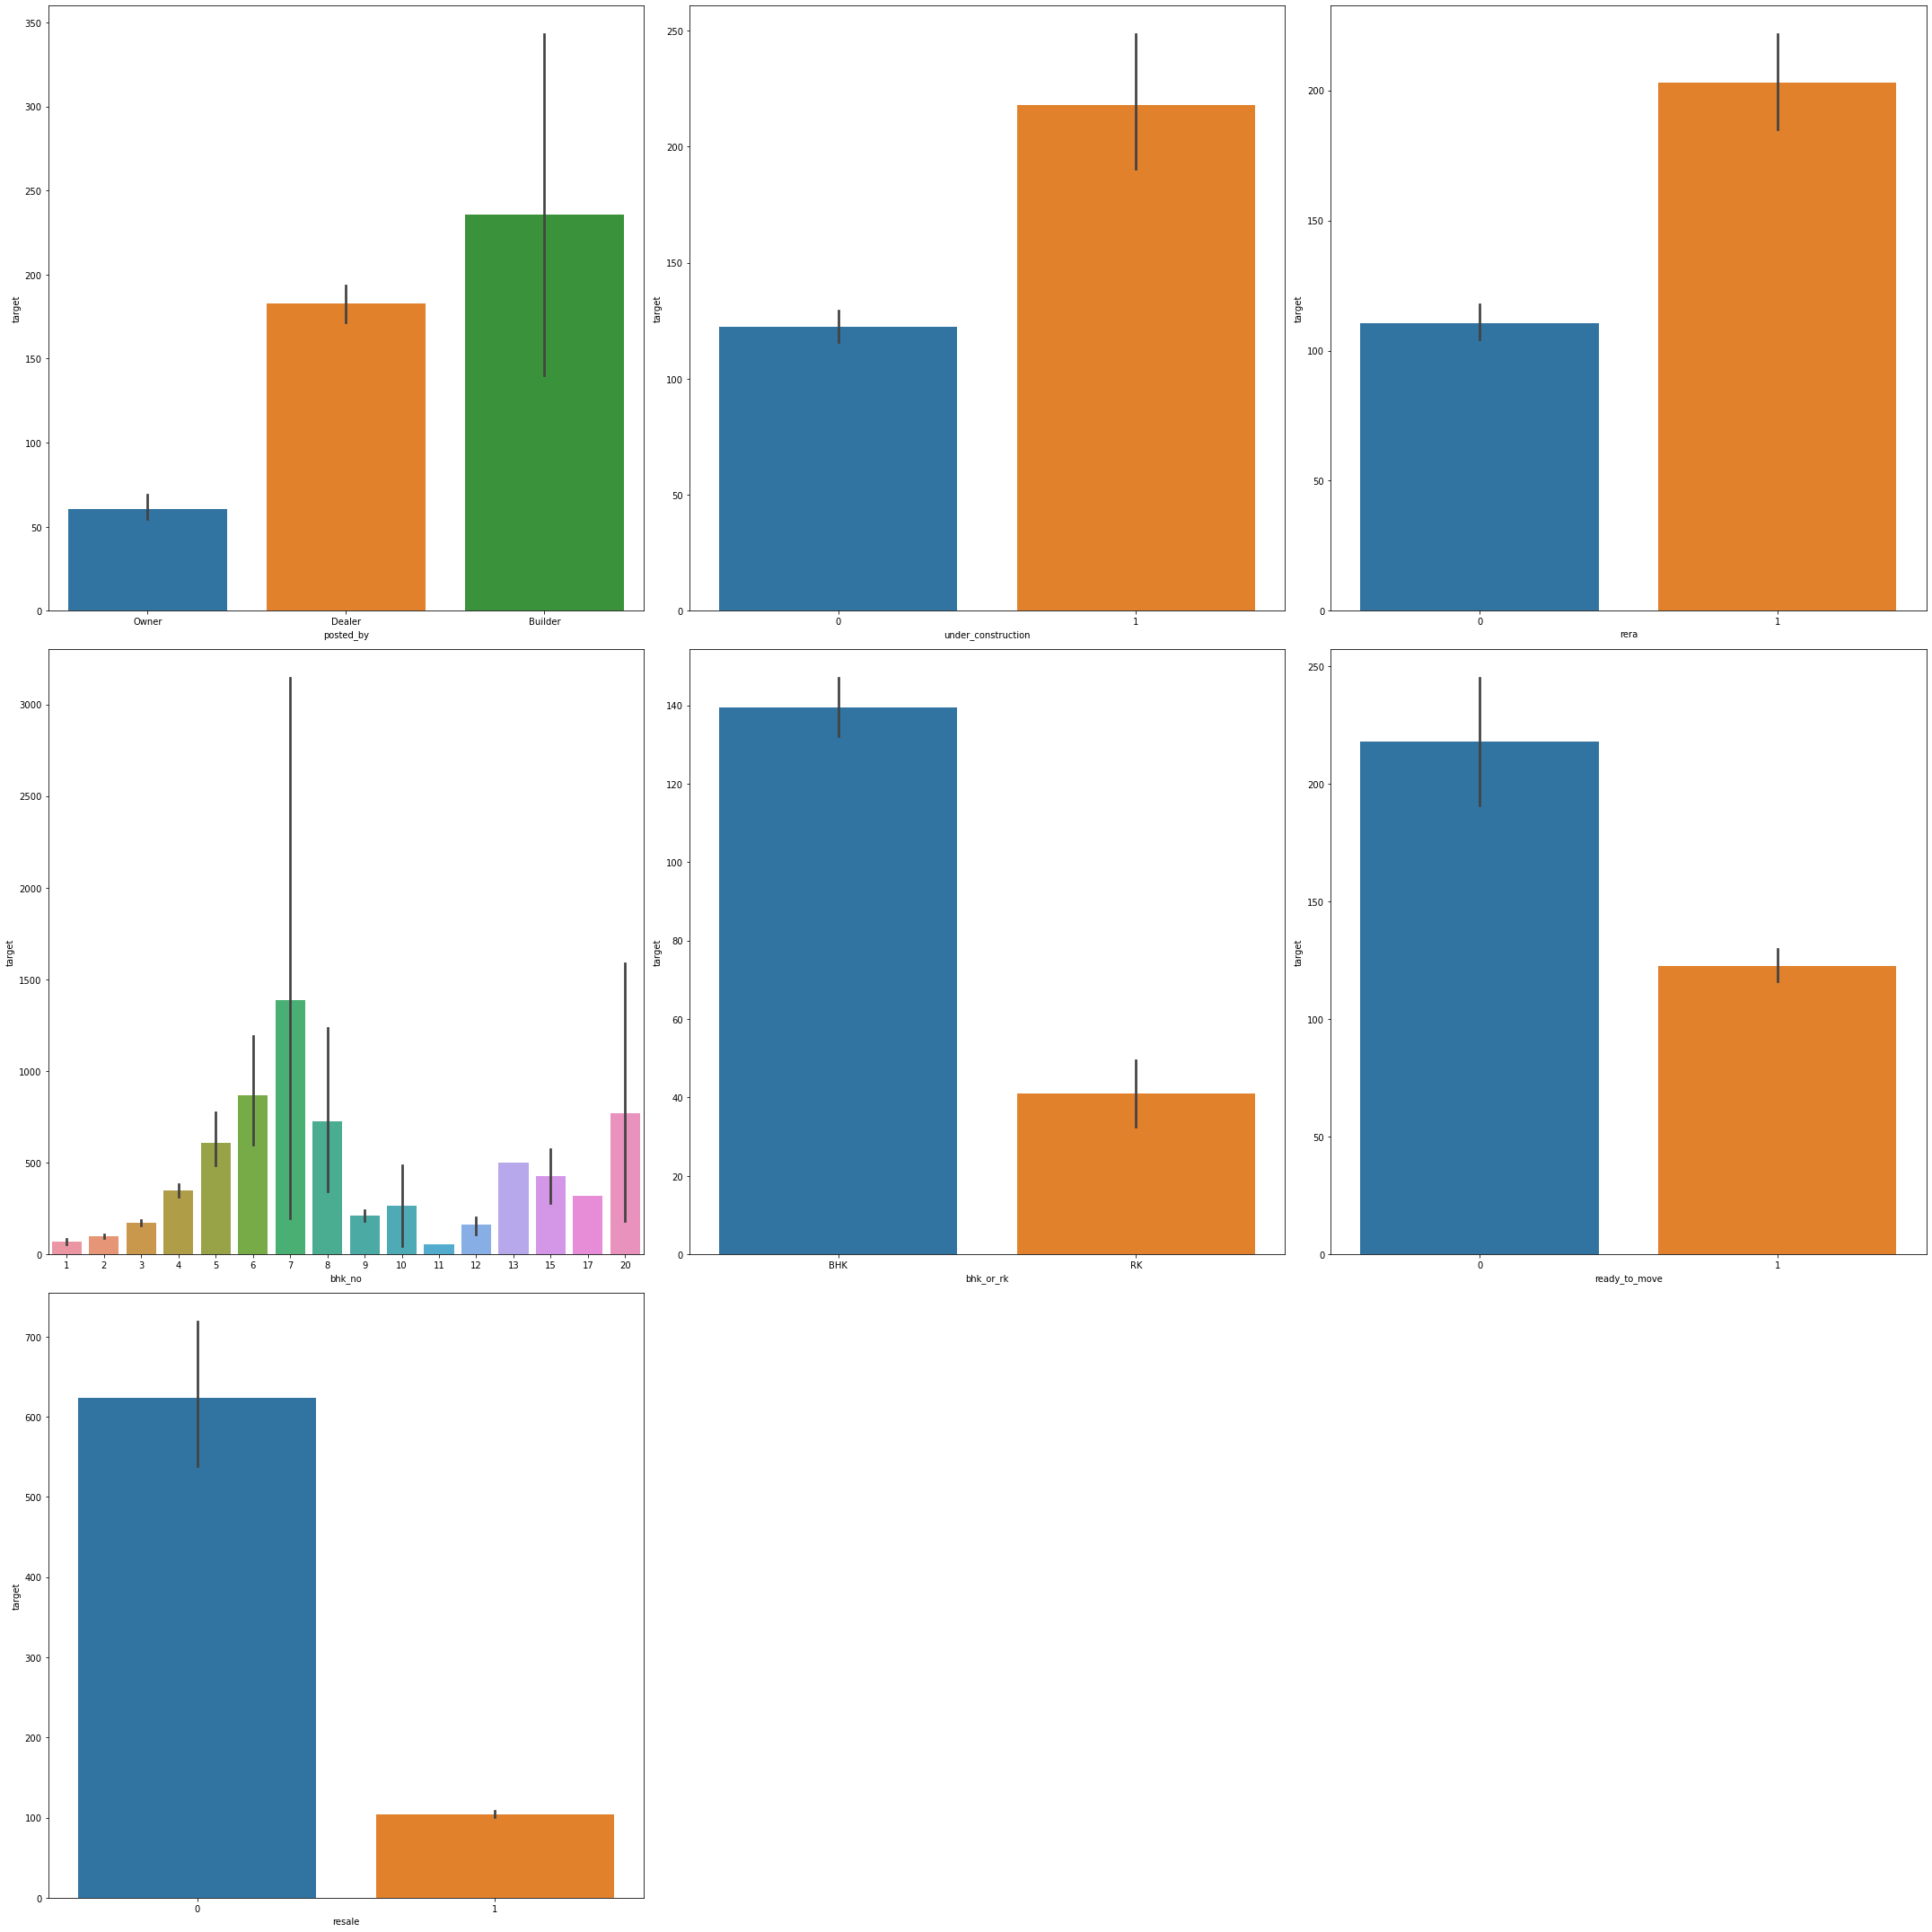

In [32]:
plt.figure(figsize=(30,30))
j=1
for columns in df_cat:
    plt.subplot(3,3,j)
    sns.barplot(y=y,x=columns,data=df)
    j+=1
plt.tight_layout()

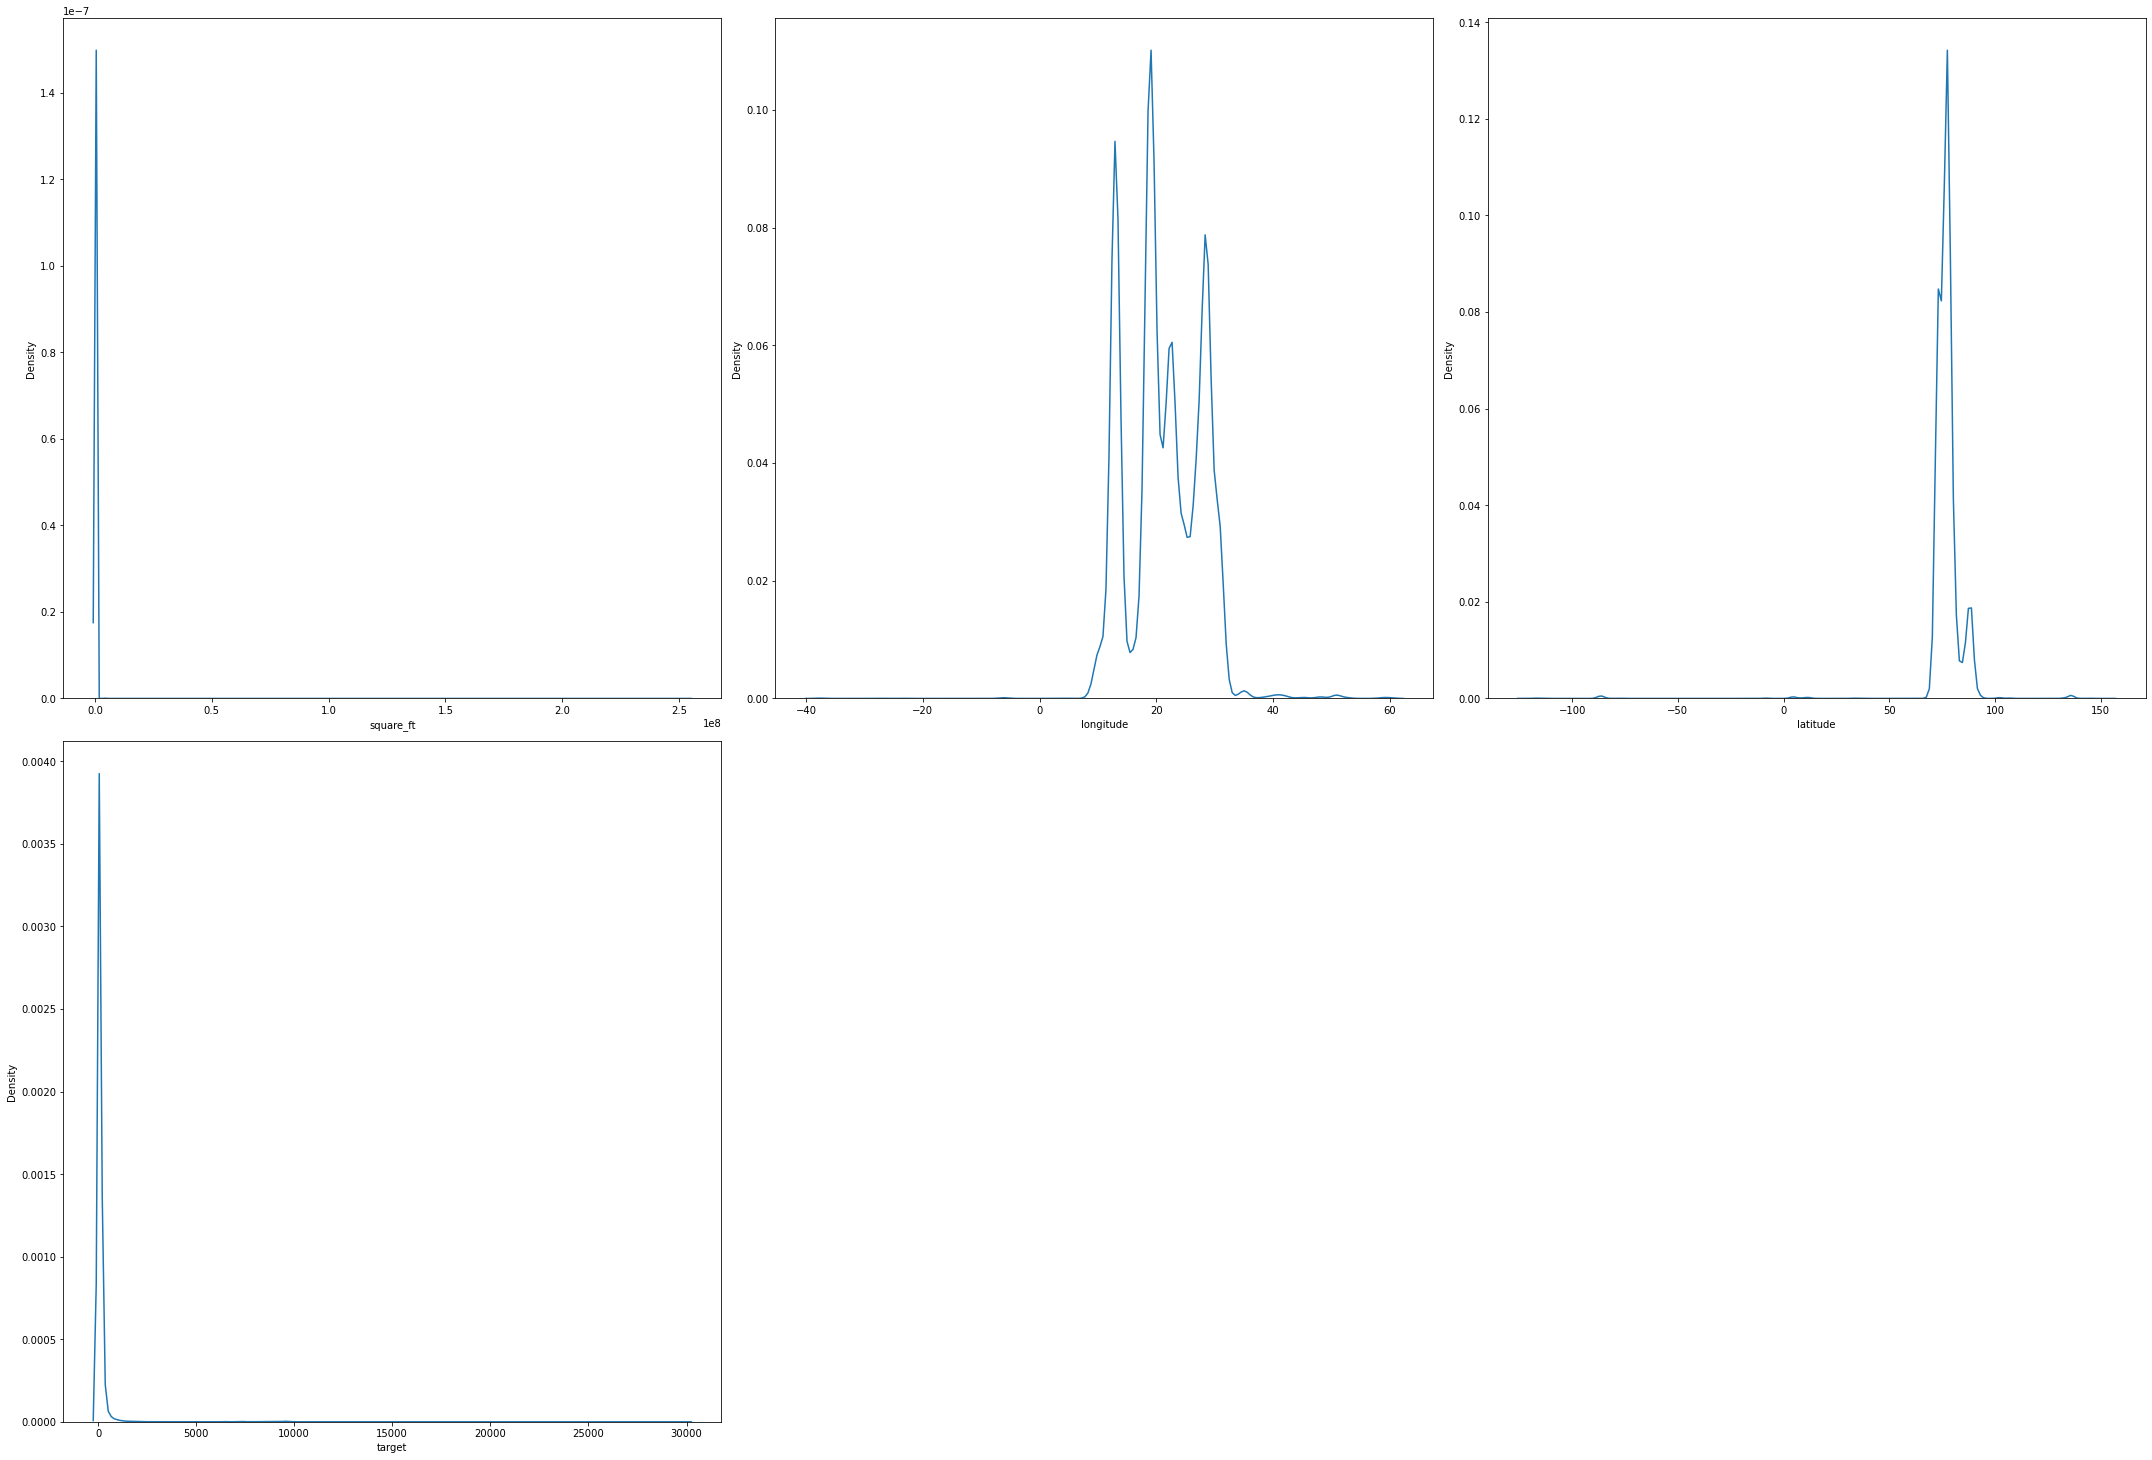

In [33]:
plt.figure(figsize=(30,30))
j=1
for columns in df_num:
    plt.subplot(3,3,j)
    sns.kdeplot(x=columns,data=df)
    j+=1
plt.tight_layout()

# Bivariante

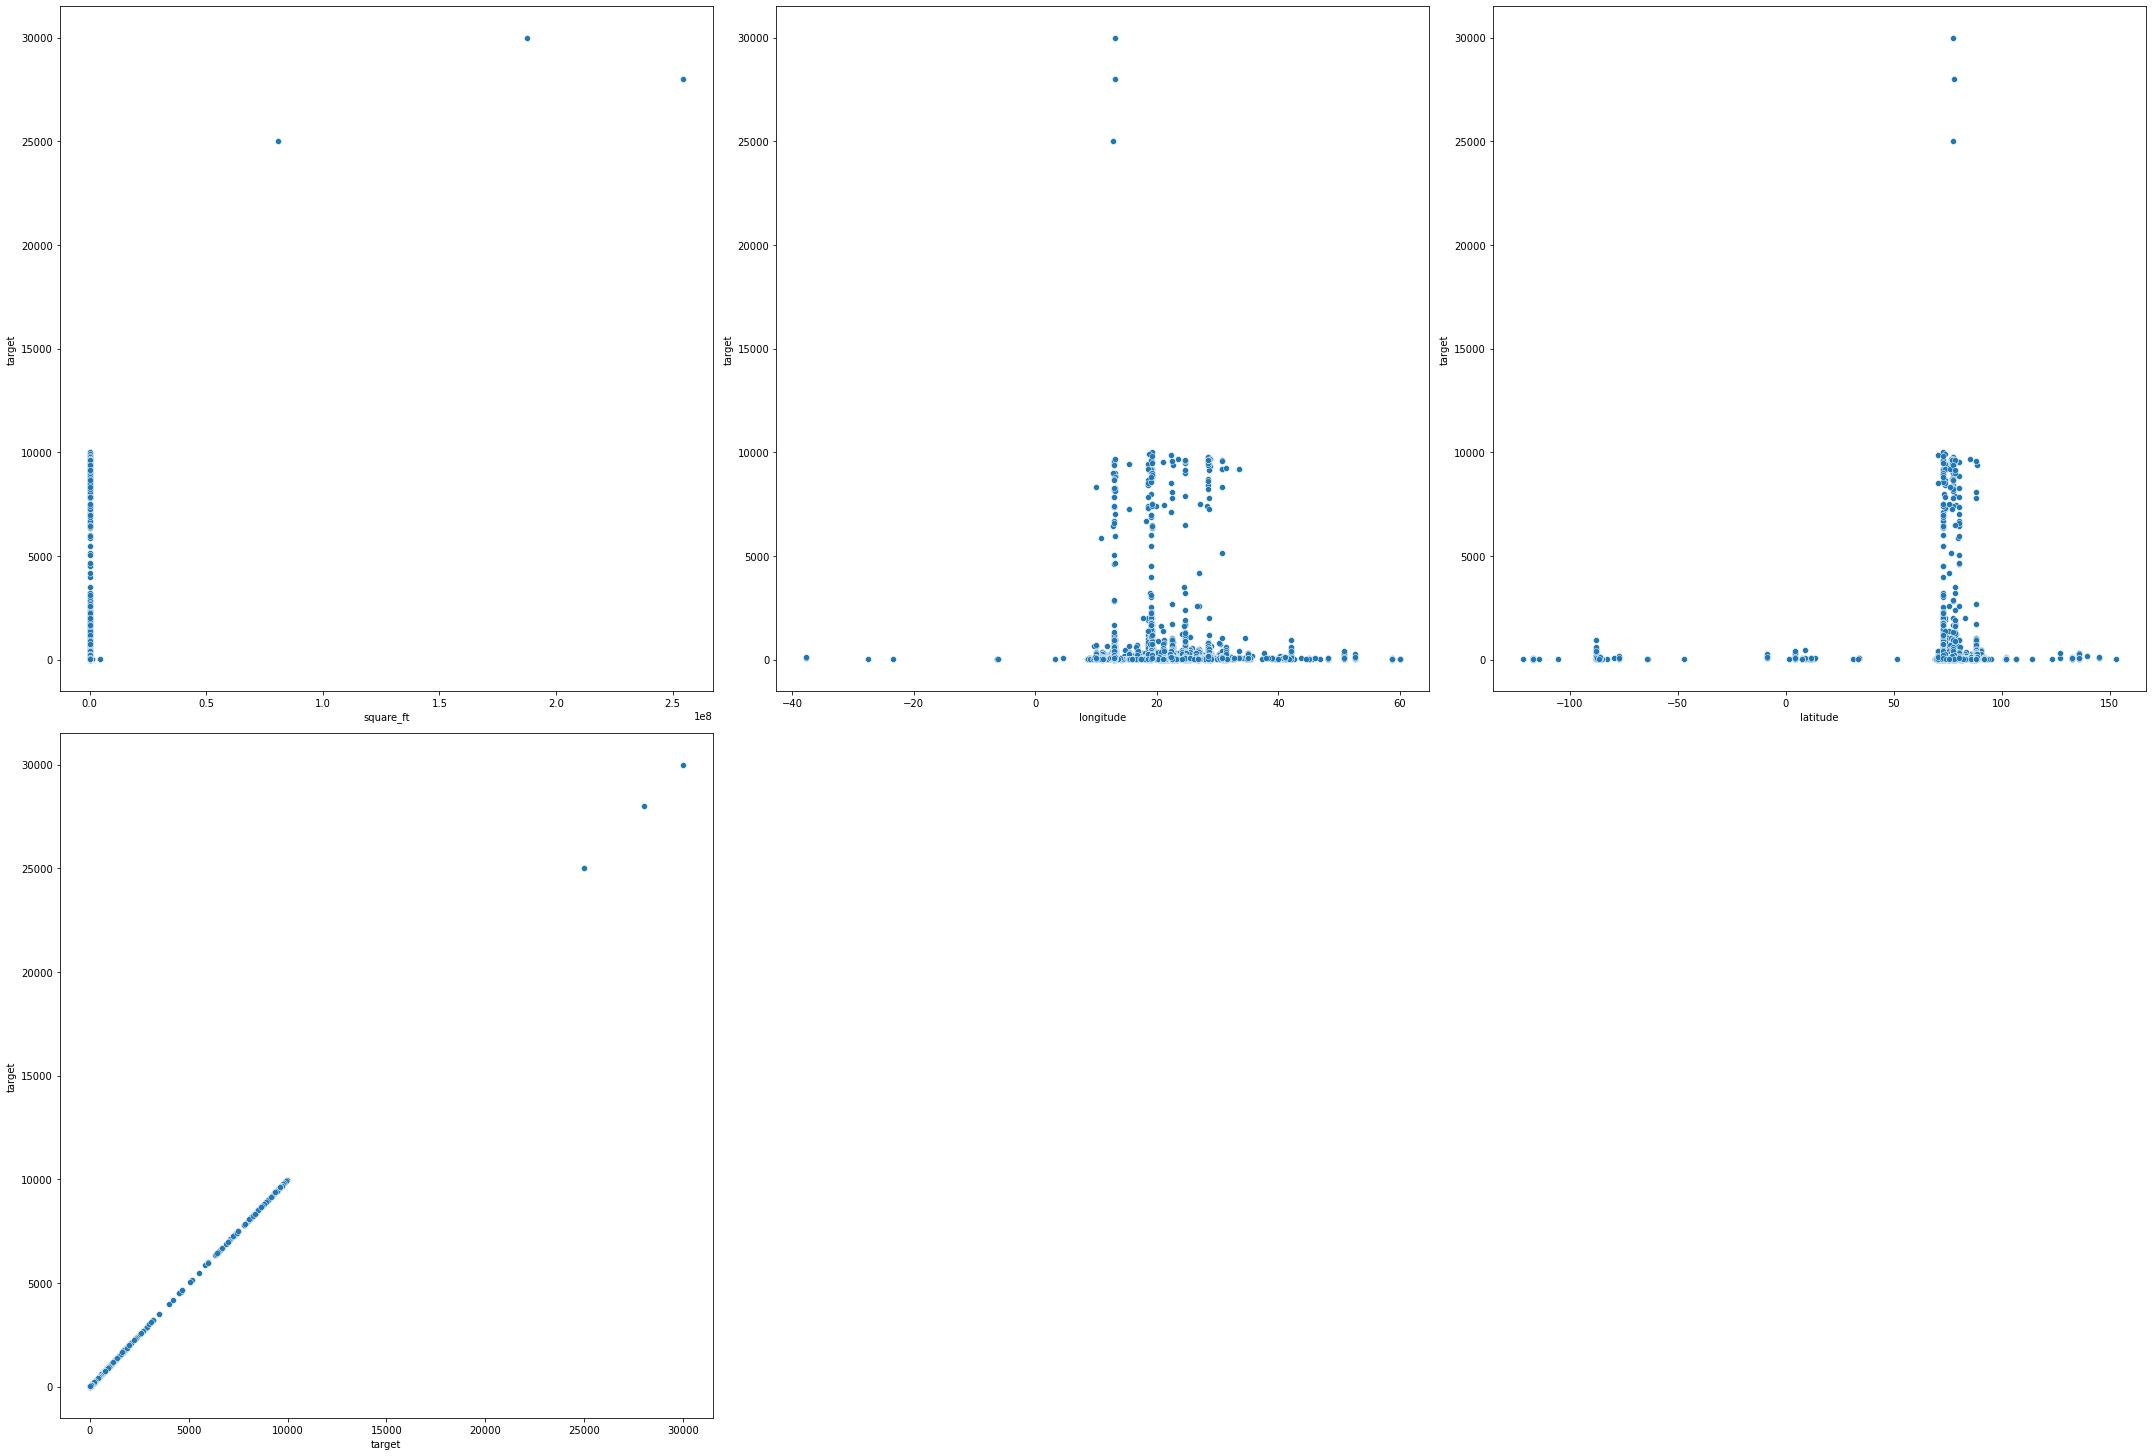

In [34]:
plt.figure(figsize=(30,30))
j=1
for columns in df_num:
    plt.subplot(3,3,j)
    sns.scatterplot(y=y,x=columns,data=df)
    j+=1
plt.tight_layout()

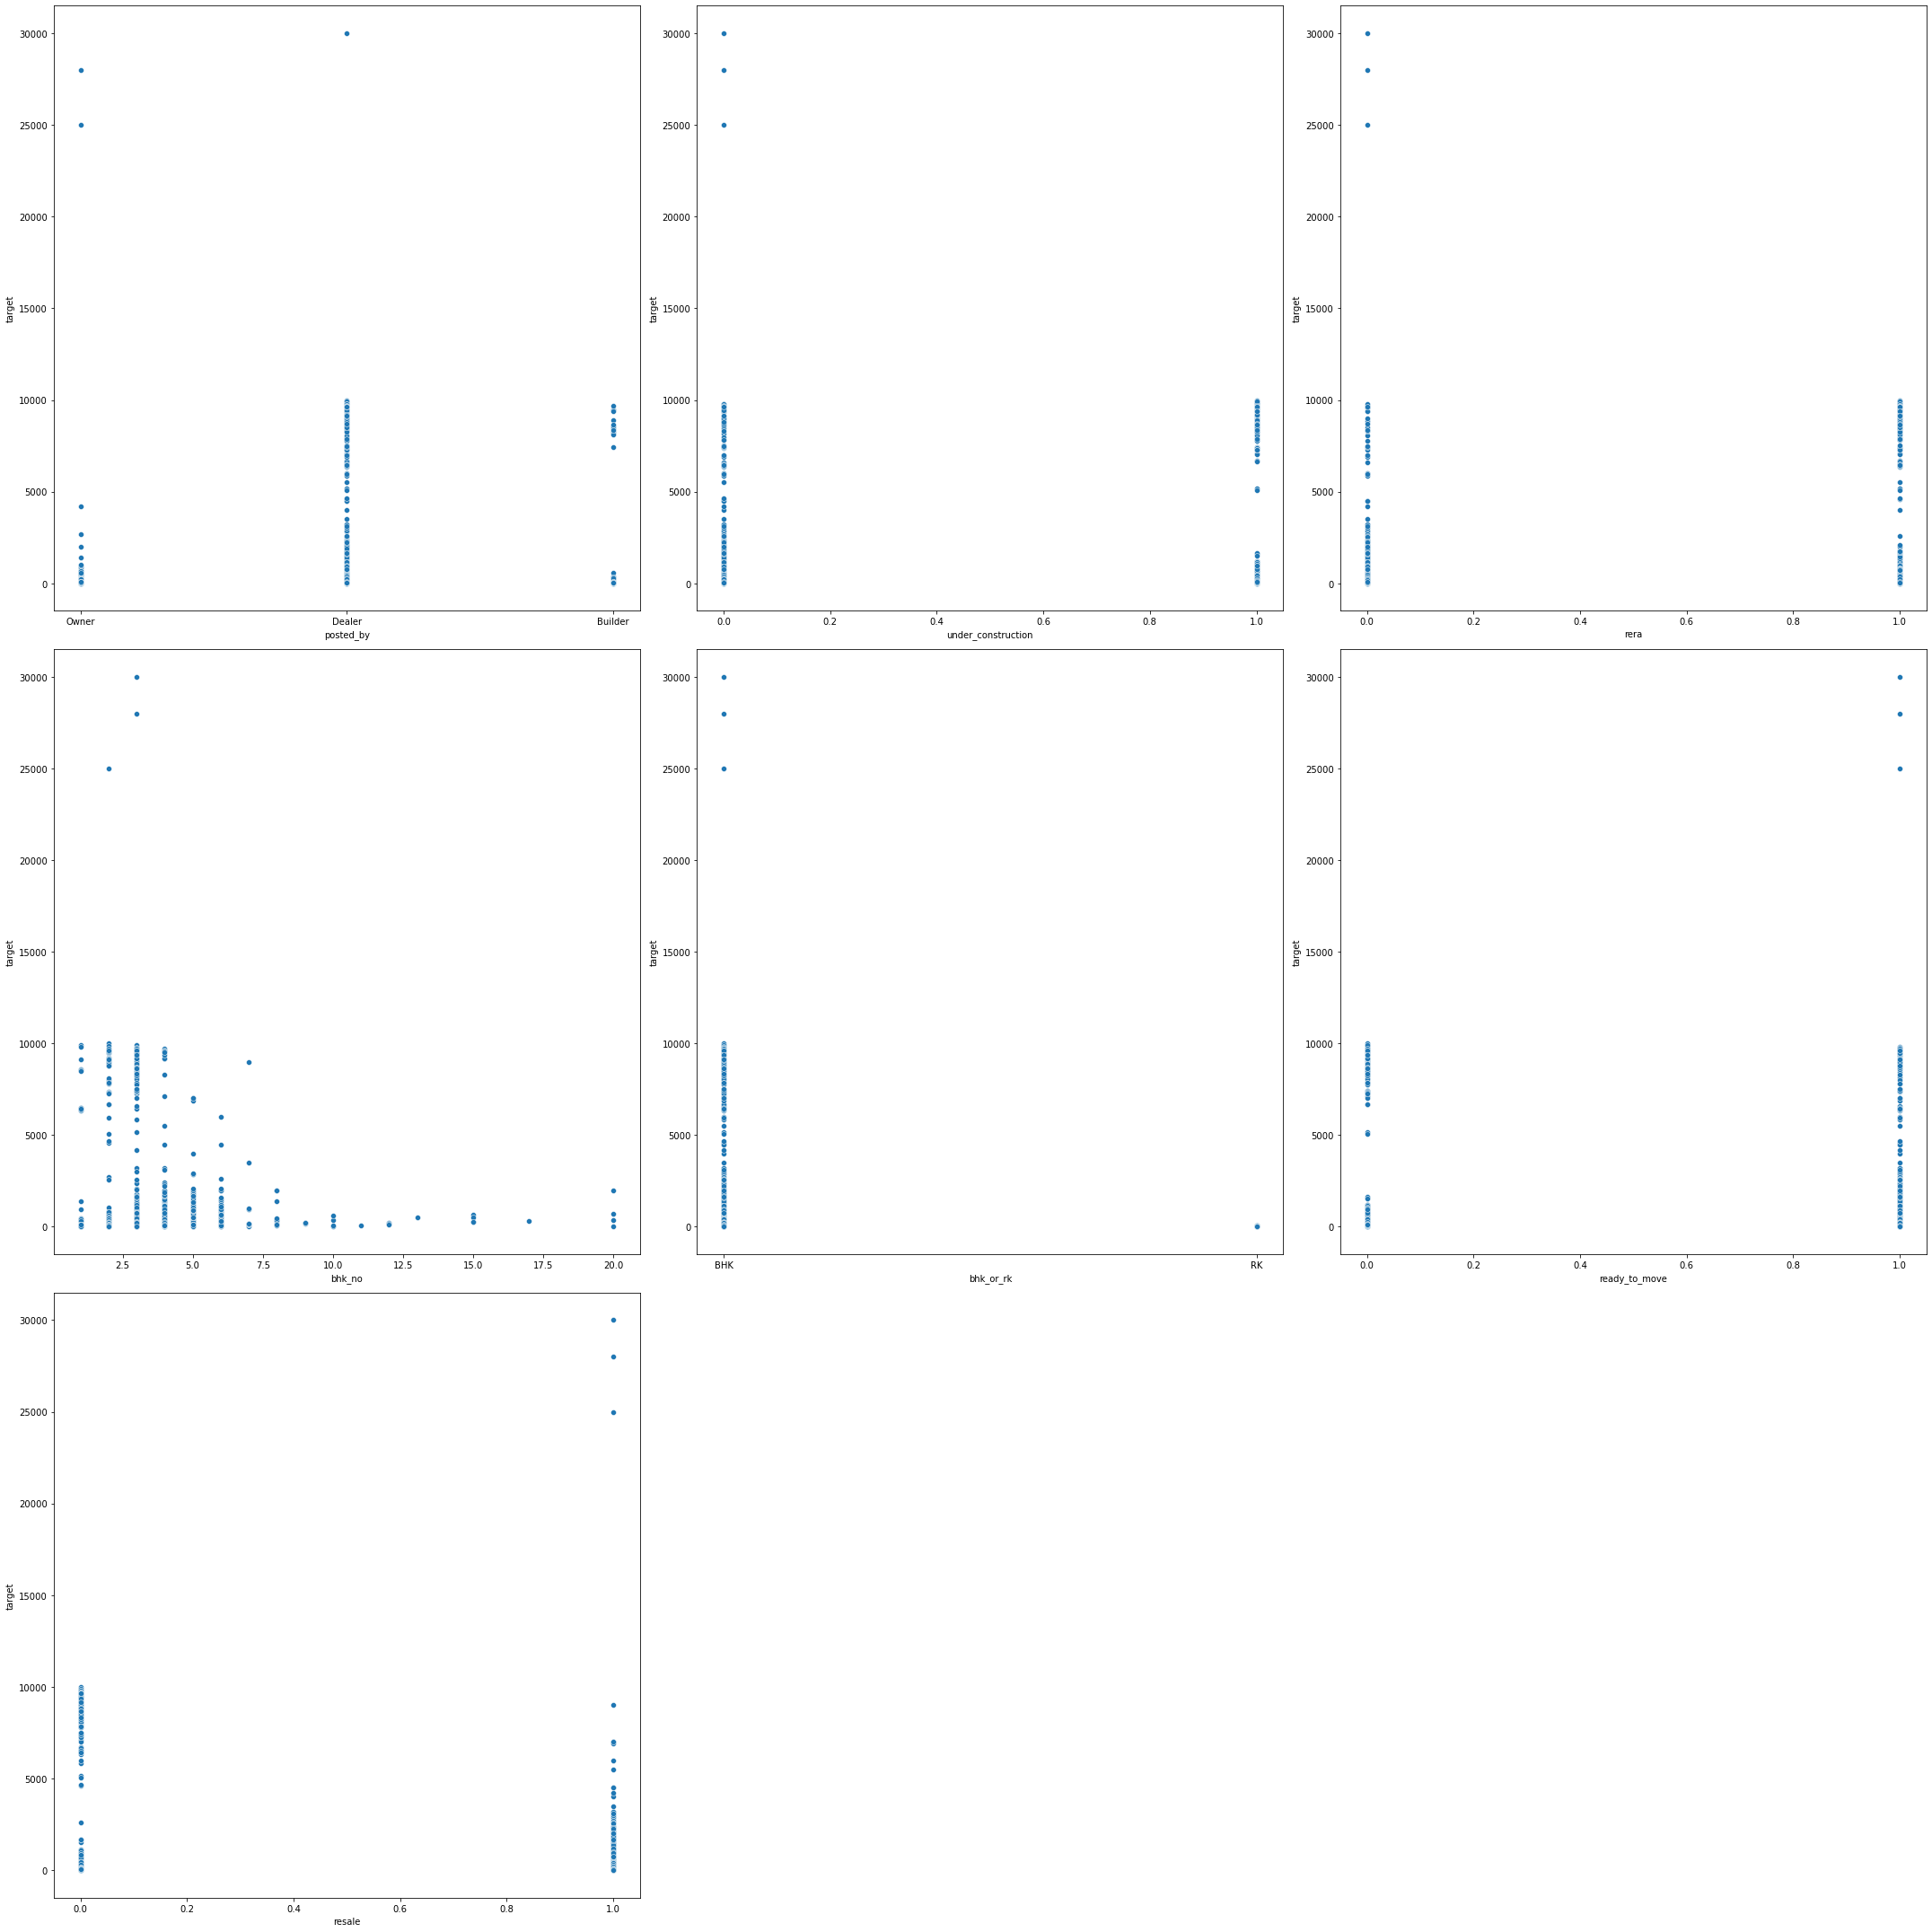

In [35]:
plt.figure(figsize=(30,30))
j=1
for columns in df_cat:
    plt.subplot(3,3,j)
    sns.scatterplot(y=y,x=columns,data=df)
    j+=1
plt.tight_layout()

# Multivariante

In [36]:
df_multi = (df.select_dtypes(exclude='object'))

In [37]:
corr=df.corr()

<AxesSubplot:>

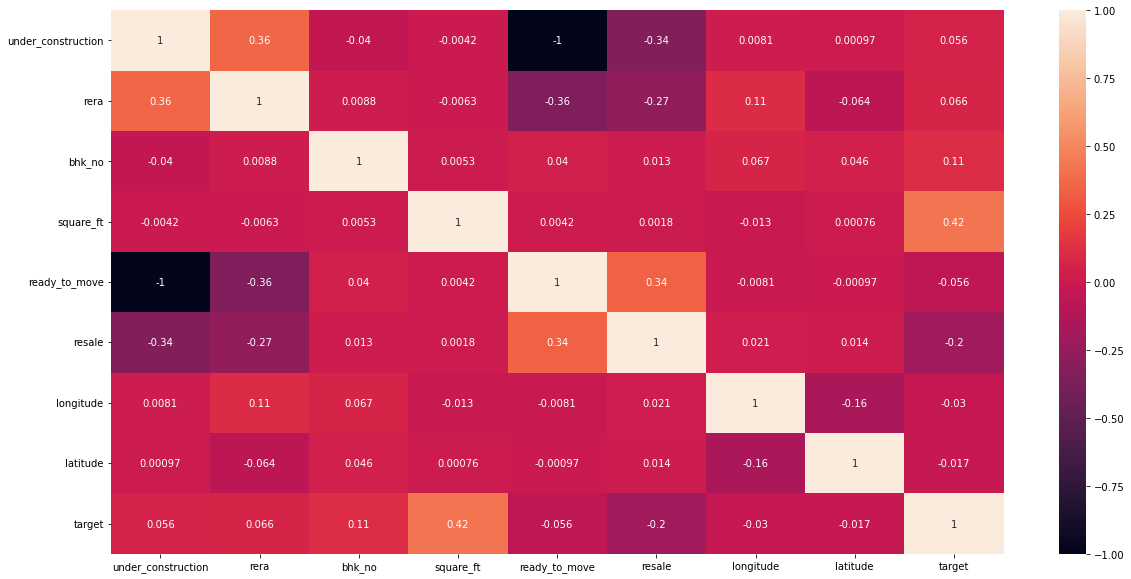

In [38]:
plt.figure(figsize=[20,10])
sns.heatmap(data=corr,annot=True)

# Find_outlier

### *log.Transfer method()

 np.log(df.target)     used to reduce outlier 

<AxesSubplot:>

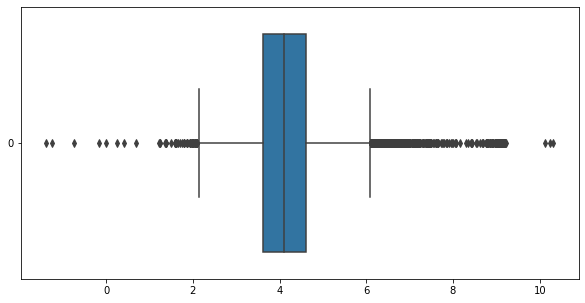

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(data = np.log(df['target']), orient = 'h')


### *square_transfer methods()

np.square(df.target) is also method to reduce the outlier

<AxesSubplot:>

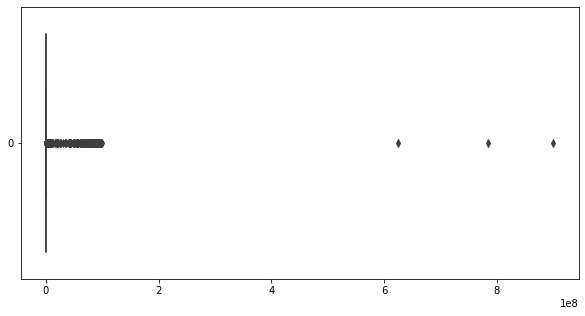

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(data = np.square(df['target']), orient = 'h')

In [41]:
def univariate_outlier(x, factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    inner = q1 - factor*iqr
    outer = q3 + factor*iqr
    out=[]
    for i,j in x.iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out


In [42]:
len(univariate_outlier(np.log(df['target']),1.5))

856

## Remove the outlier:

In [43]:
def remove_outlier(x, factor):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    inner = q1 - factor*iqr
    outer = q3 + factor*iqr
    
    index = []
    out=[]
    for idx,val in enumerate(x):
        if inner<val<outer:
            pass
        else:
            index.append(idx)
            out.append(val)
        
    return index,out

In [44]:
idx, val = remove_outlier(np.log(df.target), factor = 1.5)

In [45]:
len(idx)

856

# Assumption Testing:

# 1.Linearity check

In [46]:
x.columns

NameError: name 'x' is not defined

In [ ]:
x = df.drop(columns=['posted_by','target','bhk_or_rk'])

In [ ]:
y =df['target']

In [ ]:
from scipy.stats import pearsonr

In [ ]:
def linearity_check(x,y):
    r_data = pd.DataFrame(columns = ['F1','F2','r','p-value','Significant'])
    for i in x.columns:
        r,p = pearsonr(x[i],y)
        if p<0.05:
            r_data = r_data.append({'F1':i,'F2':y.name,'r':r,'p-value':p,'Significant':'Yes'},ignore_index = True)
        else:
            r_data = r_data.append({'F1':i,'F2':y.name,'r':r,'p-value':p,'Significant':'No'},ignore_index = True)
    return r_data

In [74]:
linearity_check(x,y)

,F1,F2,r,p-value,Significant
0,under_construction,target,0.056315,0.0,Yes
1,rera,target,0.066348,0.0,Yes
2,bhk_no,target,0.112932,0.0,Yes
3,square_ft,target,0.415189,0.0,Yes
4,ready_to_move,target,-0.056315,0.0,Yes
5,resale,target,-0.202314,0.0,Yes
6,longitude,target,-0.0296,0.000001,Yes
7,latitude,target,-0.016758,0.00462,Yes


# 2.Normality test

In [75]:
from scipy.stats import shapiro

In [76]:
def normality_test(x):
    data = pd.DataFrame(columns=['name','s','p-value','significant'])
    for i in x.columns:
        
        s,p = shapiro(x[i])
        if p<0.05:
            data = data.append(
                {'name':i,'s':s,'p-value':p,'significant':'not normal'},ignore_index = True)
        else:
            data.append({'name':i,'s':s,'p-value':p,'significant':'normal'},ignore_index=True)
    return data

In [77]:
normality_test(x)

,name,s,p-value,significant
0,under_construction,0.462833,0.0,not normal
1,rera,0.583848,0.0,not normal
2,bhk_no,0.79139,0.0,not normal
3,square_ft,0.00161,0.0,not normal
4,ready_to_move,0.463042,0.0,not normal
5,resale,0.271909,0.0,not normal
6,longitude,0.935626,0.0,not normal
7,latitude,0.325213,0.0,not normal


# 3.No mutli_co_linearity test

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [79]:
def check_multi_co_linearity(X):
    
    vif_values = [ VIF(X.values, i) for i in range(X.shape[1])]  #List Comprehension
    
    DF1= pd.DataFrame(vif_values, columns = ['VIF Value'], index = X.columns).sort_values('VIF Value', ascending = True)
    return DF1

In [80]:
check_multi_co_linearity(x)

,VIF Value
square_ft,1.000233
bhk_no,1.010068
latitude,1.032518
longitude,1.044849
resale,1.166416
rera,1.199014
under_construction,16.999472
ready_to_move,78.569206


# --------------------------------Data Preposssing----------------------------------

# Features_Scaling

### *Normalization:-

In [81]:
df.columns

Index(['posted_by', 'under_construction', 'rera', 'bhk_no', 'bhk_or_rk',
       'square_ft', 'ready_to_move', 'resale', 'longitude', 'latitude',
       'target'],
      dtype='object')

In [82]:
s = df.drop(columns=['posted_by','bhk_or_rk'])

In [83]:
from sklearn.preprocessing import minmax_scale

In [84]:
mm = minmax_scale(s)

In [85]:
normal = pd.DataFrame(mm,columns=s.columns)

In [86]:
normal

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,target
0,0.0,0.0,0.052632,0.000005,1.0,1.0,0.519154,0.725671,0.001825
1,0.0,0.0,0.052632,0.000005,1.0,1.0,0.512032,0.722201,0.001692
2,0.0,0.0,0.052632,0.000004,1.0,1.0,0.517189,0.725796,0.001425
3,0.0,1.0,0.052632,0.000004,1.0,1.0,0.679690,0.724748,0.002075
4,1.0,0.0,0.052632,0.000004,0.0,1.0,0.617717,0.765300,0.002008
...,...,...,...,...,...,...,...,...,...
28561,0.0,0.0,0.105263,0.000010,1.0,1.0,0.664308,0.727292,0.001492
28562,0.0,0.0,0.052632,0.000003,1.0,1.0,0.795469,0.129623,0.000525
28563,0.0,0.0,0.052632,0.000004,1.0,1.0,0.662138,0.719228,0.000895
28564,0.0,0.0,0.052632,0.000004,1.0,1.0,0.518440,0.735244,0.002225


### *Standardization

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
sc = StandardScaler()

In [89]:
x_sc = sc.fit_transform(normal)

In [90]:
x_sc = pd.DataFrame(x_sc,columns=normal.columns)

In [91]:
x_sc

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,target
0,-0.463799,-0.675525,-0.447136,-0.009863,0.463799,0.270077,-1.335944,0.066618,-0.130475
1,-0.463799,-0.675525,-0.447136,-0.009876,0.463799,0.270077,-1.447415,-0.022942,-0.136661
2,-0.463799,-0.675525,-0.447136,-0.010053,0.463799,0.270077,-1.366703,0.069834,-0.149034
3,-0.463799,1.480329,-0.447136,-0.010054,0.463799,0.270077,1.176418,0.042808,-0.118876
4,2.156108,-0.675525,-0.447136,-0.010019,-2.156108,0.270077,0.206557,1.089364,-0.121969
...,...,...,...,...,...,...,...,...,...
28561,-0.463799,-0.675525,0.688635,-0.009241,0.463799,0.270077,0.935692,0.108452,-0.145941
28562,-0.463799,-0.675525,-0.447136,-0.010138,0.463799,0.270077,2.988362,-15.316315,-0.190791
28563,-0.463799,-0.675525,-0.447136,-0.010006,0.463799,0.270077,0.901733,-0.099656,-0.173624
28564,-0.463799,-0.675525,-0.447136,-0.010056,0.463799,0.270077,-1.347127,0.313682,-0.111917


# Feature_Encoding:

In [92]:
df_cat.columns

Index(['posted_by', 'under_construction', 'rera', 'bhk_no', 'bhk_or_rk',
       'ready_to_move', 'resale'],
      dtype='object')

In [93]:
df.posted_by.value_counts()

Dealer     17508
Owner      10448
Builder      610
Name: posted_by, dtype: int64

In [94]:
x_cat = pd.get_dummies(df.drop(columns=['target','square_ft','longitude','latitude']), drop_first = True)

In [95]:
x_sc.shape, x_cat.shape

((28566, 9), (28566, 8))

In [96]:
x_cat.reset_index(drop = True, inplace = True)
x_sc.reset_index(drop = True, inplace = True)

In [97]:
df_model=pd.concat([x_cat, x_sc], axis = 1)

In [98]:
df_model

,under_construction,rera,bhk_no,ready_to_move,resale,posted_by_Dealer,posted_by_Owner,bhk_or_rk_RK,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,target
0,0,0,2,1,1,0,1,0,-0.463799,-0.675525,-0.447136,-0.009863,0.463799,0.270077,-1.335944,0.066618,-0.130475
1,0,0,2,1,1,1,0,0,-0.463799,-0.675525,-0.447136,-0.009876,0.463799,0.270077,-1.447415,-0.022942,-0.136661
2,0,0,2,1,1,0,1,0,-0.463799,-0.675525,-0.447136,-0.010053,0.463799,0.270077,-1.366703,0.069834,-0.149034
3,0,1,2,1,1,0,1,0,-0.463799,1.480329,-0.447136,-0.010054,0.463799,0.270077,1.176418,0.042808,-0.118876
4,1,0,2,0,1,1,0,0,2.156108,-0.675525,-0.447136,-0.010019,-2.156108,0.270077,0.206557,1.089364,-0.121969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28561,0,0,3,1,1,0,1,0,-0.463799,-0.675525,0.688635,-0.009241,0.463799,0.270077,0.935692,0.108452,-0.145941
28562,0,0,2,1,1,0,1,0,-0.463799,-0.675525,-0.447136,-0.010138,0.463799,0.270077,2.988362,-15.316315,-0.190791
28563,0,0,2,1,1,1,0,0,-0.463799,-0.675525,-0.447136,-0.010006,0.463799,0.270077,0.901733,-0.099656,-0.173624
28564,0,0,2,1,1,0,1,0,-0.463799,-0.675525,-0.447136,-0.010056,0.463799,0.270077,-1.347127,0.313682,-0.111917


In [99]:
df_model.shape

(28566, 17)

In [100]:
X = df_model .iloc[:,:-1]

In [101]:
Y = df_model.iloc[:,-1]

# Train & Test Split

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=70)

In [104]:
x_train.shape

(19996, 16)

In [105]:
x_test.shape

(8570, 16)

In [106]:
y_train.shape

(19996,)

In [107]:
y_test.shape

(8570,)

# Linear_Model_Building----->1

In [108]:
import statsmodels.api as sm

In [109]:
model1 = sm.OLS(y_train,x_train).fit()

In [110]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     245.4
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        12:02:36   Log-Likelihood:                -25015.
No. Observations:               19996   AIC:                         5.005e+04
Df Residuals:                   19985   BIC:                         5.014e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
under_construction   1.15e+13    1.2e+12      9.544      0.000    9.14e+12    1.39e+13
rera               -3.228e+12   6.67e+11     -4.836      0.000   -4.54e+12   -1.92e+12
bhk_no              6.249e+10   3.34e+11      0.187      0.852   -5.93e+11    7.18e+11
ready_to_move      -8.338e+11   1.38e+12     -0.605      0.545   -3.54e+12    1.87e+12
resale             -5.227e+11   3.13e+11     -1.673      0.094   -1.14e+12    8.99e+10
posted_by_Dealer       0.6919      0.049     14.073      0.000       0.596       0.788
posted_by_Owner        0.5826      0.051     11.491      0.000       0.483       0.682
bhk_or_rk_RK          -0.1313      0.206     -0.638      0.523      -0.535       0.272
under_construction -2.396e+12   1.99e+11    -12.066      0.000   -2.79e+12   -2.01e+12
rera                1.497e+12    3.1e+11      4.836      0.000    8.91e+11     2.1e+12
bhk_no             -5.502e+10   2.94e+11     -0.187      0.852   -6.32e+11    5.22e+11
square_ft             10.1121      0.360     28.085      0.000       9.406      10.818
ready_to_move        2.31e+12   2.02e+11     11.436      0.000    1.91e+12    2.71e+12
resale              1.316e+11   7.87e+10      1.673      0.094   -2.26e+10    2.86e+11
longitude             -0.0367      0.006     -5.970      0.000      -0.049      -0.025
latitude              -0.0222      0.006     -3.664      0.000      -0.034      -0.010
==============================================================================
Omnibus:                    33098.774   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32758261.688
Skew:                          11.098   Prob(JB):                         0.00
Kurtosis:                     200.041   Cond. No.                     4.14e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
y_pred_1 = model1.predict(x_train) 
y_pred_2 = model1.predict(x_test)

### 1.Root_mean_square_Error:

In [112]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [113]:
rmse_1 = np.sqrt(mse(y_train,y_pred_1))
rmse_2 = np.sqrt(mse(y_test,y_pred_2))

In [114]:
print(f"Train:{rmse_1}\nTest:{rmse_2}")

Train:0.8453930404269641
Test:17.730239653213772


### 2.Mean_Absolute_Percentage_Error

In [115]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [116]:
mape_1 = mape(y_train,y_pred_1)
mape_2 = mape(y_test,y_pred_2)

In [117]:
print(f"Train:{mape_1}\nTest:{mape_2}")

Train:4.321214513168087
Test:3.84655014195225


# Hyperparameter Tuning:

## ----------Ridge------------

In [125]:
from sklearn.linear_model import Ridge, Lasso

In [126]:
ridge = Ridge(alpha=0.8)
ridge.fit(x_train, y_train)

Ridge(alpha=0.8)

In [127]:
y_pred_ridge1 = ridge.predict(x_train)
y_pred_ridge2= ridge.predict(x_test)

### *RMSE

In [128]:
rmse_ridge1 = np.sqrt(mse(y_train,y_pred_ridge1))
rmse_ridge2 = np.sqrt(mse(y_test,y_pred_ridge2))

In [129]:
print(f"Train:{rmse_ridge1}\nTest:{rmse_ridge2}")

Train:0.841518240067232
Test:15.643697762877865


### *MAPE

In [130]:
mape_ridge1 = mape(y_train,y_pred_ridge1)
mape_ridge2 = mape(y_test,y_pred_ridge2)

In [131]:
print(f'Train:{mape_ridge1}\nTest:{mape_ridge2}')

Train:4.03887671718543
Test:3.894892107661077


# ------------lasso----------

In [132]:
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [133]:
y_pred_lasso1 = lasso.predict(x_train)
y_pred_lasso2 = lasso.predict(x_test)

### *RMSE

In [134]:
rmse_lasso1 = np.sqrt(mse(y_train,y_pred_lasso1))
rmse_lasso2 = np.sqrt(mse(y_test,y_pred_lasso2))

In [135]:
print(f'Train={rmse_lasso1}\nTest={rmse_lasso2}')

Train=0.8958021683839653
Test=1.2087223911246705


### *MAPE

In [136]:
mape_lasso1 = mape(y_train,y_pred_lasso1)
mape_lasso2 = mape(y_test,y_pred_lasso2)

In [137]:
print(f'Train={mape_lasso1}\nTest={mape_lasso2}')

Train=1.0502298503958187
Test=1.0395612388054332


In [141]:
from sklearn.metrics import r2_score as r2

In [142]:
y_r2_train = r2(y_train,y_pred_lasso1)

In [143]:
y_r2_train

0.0

# ---------------------------------------Another_Model_Building------------------------------------

In [148]:
from sklearn.decomposition import PCA

In [149]:
pca = PCA(0.95)

In [150]:
pca_x_train = pca.fit_transform(x_train)

In [151]:
pca_x_test = pca.transform(x_test)

## Linear_Model_Building------>2

In [152]:
import statsmodels.api as sm

In [177]:
pca_x_train_1 = sm.add_constant(pca_x_train)
model = sm.OLS(y_train,pca_x_train_1).fit()

In [178]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     250.1
Date:                Fri, 05 May 2023   Prob (F-statistic):          1.71e-309
Time:                        12:24:04   Log-Likelihood:                -25449.
No. Observations:               19996   AIC:                         5.091e+04
Df Residuals:                   19989   BIC:                         5.097e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0055      0.006     -0.906      0.365      -0.018       0.006
x1             0.0598      0.004     16.505      0.000       0.053       0.067
x2             0.0838      0.005     18.607      0.000       0.075       0.093
x3            -0.0061      0.006     -1.093      0.275      -0.017       0.005
x4            -0.1301      0.006    -20.686      0.000      -0.142      -0.118
x5             0.1220      0.007     18.523      0.000       0.109       0.135
x6            -0.0724      0.007    -10.463      0.000      -0.086      -0.059
==============================================================================
Omnibus:                    35190.909   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29156563.212
Skew:                          12.831   Prob(JB):                         0.00
Kurtosis:                     188.301   Cond. No.                         1.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### *Train_predic--&--Test_predic

In [155]:
y_pred_train = model.predict(pca_x_train)
y_pred_test = model.predict(pca_x_test)

# Mean_Square_Error:

In [156]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

### *RMSE_train

In [157]:
rmse = np.sqrt(mse(y_train,y_pred_train))

In [158]:
rmse

0.8639819521544949

### *RMSE_test

In [159]:
RMSE= np.sqrt(mse(y_test,y_pred_test))

In [160]:
RMSE

1.1842981876761232

In [182]:
from sklearn.metrics import *

In [184]:
r2 = r2_score(y_test,y_pred_test)

In [185]:
r2

0.03978132657983291

##### Dataframe of RMSE for good understanding

In [161]:
value1=[[rmse,RMSE]]

In [162]:
data1 = pd.DataFrame(value1,columns=['Train_RMSE','Test_RMSE'])

In [163]:
data1

,Train_RMSE,Test_RMSE
0,0.863982,1.184298


# MAPE_Testing

In [164]:
from sklearn.metrics import mean_absolute_percentage_error as mape

#### *MAPE_TRAIN

In [165]:
MAPE = mape(y_train,y_pred_train) 

In [166]:
MAPE

3.874889801532298

#### *MAPE_TEST

In [167]:
MAP = mape(y_test,y_pred_test)

In [174]:
r2_score(y_test,y_pred_test)

0.03978132657983291

In [169]:
MAP

3.7190795713296985

#### Dataframe of MAPE for good understanding

In [170]:
value2 = [[MAPE,MAP]]

In [171]:
value2

[[3.874889801532298, 3.7190795713296985]]

In [172]:
data2 = pd.DataFrame(value2,columns=['Train_MAPE','Test_MAPE'])

In [173]:
data2

,Train_MAPE,Test_MAPE
0,3.87489,3.71908
